# Titanic 생존여부 분석 및 예측 모델

## 환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

# 1.범주형 Y

## 1.1 타이타닉 탑승객 데이터 : 기본

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [3]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
target = 'Survived'

### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Survived

1) 그래프 : histogram, densityplot

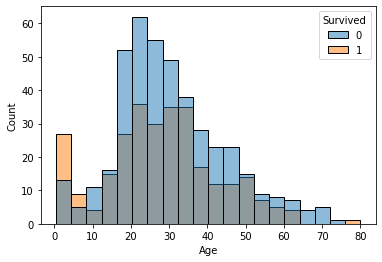

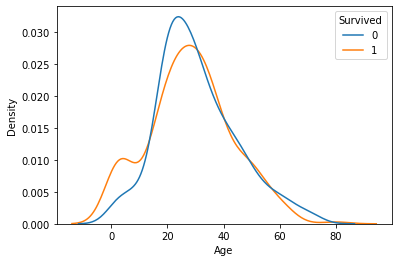

In [9]:
sns.histplot(x='Age',data=titanic,hue='Survived')
plt.show()
sns.kdeplot(x='Age',data=titanic,hue='Survived',common_norm=False)
plt.show()

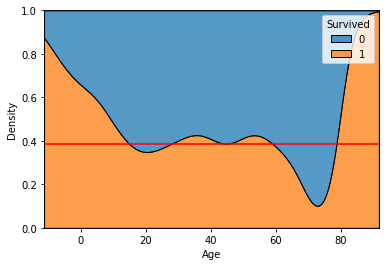

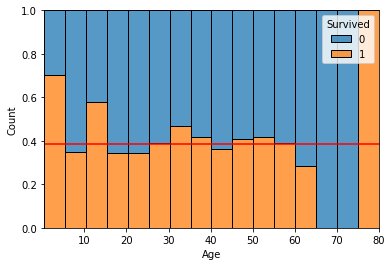

In [7]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived'
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

sns.histplot(x='Age', data = titanic, bins = 16
            , hue ='Survived', multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

2) 수치화 : 로지스틱회귀

In [73]:
temp = titanic['Age'].loc[titanic['Age'].notnull()]
temp.isna().sum()

0

In [24]:
model = sm.Logit(titanic['Survived'], temp['Age'])
result = model.fit()
print(result.pvalues)

KeyError: 'Age'

3) 관계 평가하기

> 20세 미만은 전체 비율 중 생존 비율이 더 높은 것으로 보아 어린 아이들 위주로 구조를 했다

> 20세 부터는 생존하지 못 한 비율이 더 많은 것으로 보인다.

> 45~60세 에서 생존비율이 평균을 넘고있는 것으로 보아 부모님일 가능성이 있다.

> 노약자는 몸이 불편해 구조에 어려움이 있던 것으로 보인다.

> 결론은 나이에 따라 생존은 차이가 있다.

* 그래프상에서, 
    * 10대 이하의 탑승객이 전체 평균대비 생존율이 높고, 20~30대, 60대에서 생존율이 낮아 진다.
    * 나이에 따라서 생존여부가 차이가 있어 보인다. (아주 커보이지는 않음)
* 로지스틱회귀로 부터
    * p 값은 0.05보다 작게 나옴.(그러나 완전 0에 수렴하는 것은 아님)

* 결론 : 관계가 있다.(강한 관계는 아님)

4) 추가 분석할 내용 정리

* 나이대를 적절하게 나눠서 비교해볼까?


#### ② Fare --> Survived

1) 그래프 : histogram, densityplot

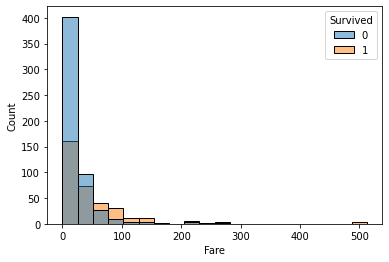

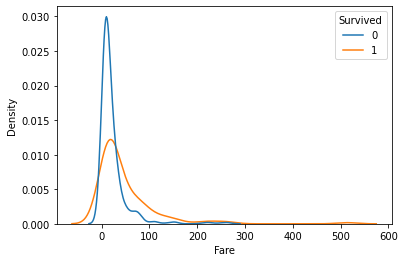

In [37]:
sns.histplot(x='Fare',data=titanic,hue=target, bins =20)
plt.show()

sns.kdeplot(x='Fare',data=titanic,hue=target,common_norm=False)
plt.show()

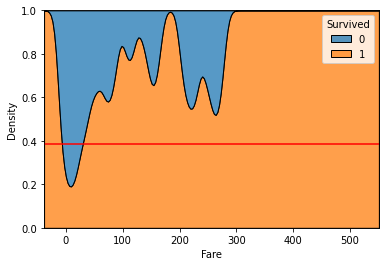

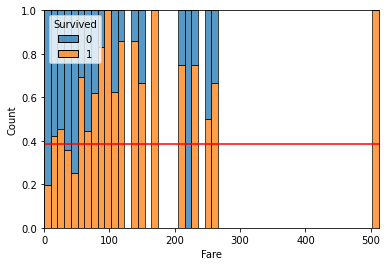

In [75]:
sns.kdeplot(x='Fare', data = titanic, hue =target
            , multiple = 'fill')
plt.axhline(titanic[target].mean(), color = 'r')
plt.show()

sns.histplot(x='Fare', data = titanic, bins = 50
            # 전체구간이 0~512달러 이므로, 대략 한 구간이 10달러 정도 되도록 50으로 나눔
            , hue =target, multiple = 'fill')
plt.axhline(titanic[target].mean(), color = 'r')
plt.show()

2) 수치화 : 로지스틱회귀

In [34]:
model = sm.Logit(titanic[target], titanic['Fare'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4
Fare    0.014925
dtype: float64


3) 관계 평가하기

* 운임비용 150 전 까지는 운임비용이 높아질 수록 생존율이 높아지고 있음
* 200~300에서 갑자기 생존율이 낮아지고 있음
=> 이유가 뭘까?
* 수치와 그래프를 통해 운임비용은 생존율에 큰 차이는 아니지만 있음!

* 그래프상에서, 
    * 0~10달러 에 생존율이 전체평균 대비 굉장히 낮음. 
    * 10~30달러 에 생존율이 전체평균 대비 살짝 높다가 ==> 이유 확인 필요
    * 30~50달러 에 다시 생존율이 낮아짐
    * 50달러 이후부터는 대부분의 구간에서 생존율이 높음. ==> 이유 확인 필요.
        * 운임 50달러의 기준/ 의미가 무엇일까?
    * 그래프상으로는 나이보다, 운임이 더 관련이 높아 보임.
* 로지스틱회귀로 부터
    * p 값은 0.05보다 작게 나옴.(0.01)

* 결론 : p 값이 0.05 와 차이가 크지 않다면 약한 관계로 볼 수 있으나, 로지스틱 회귀로 판정하는 것은 미봉책.
그러므로, 그래프 관점에서, 중간 정도의 관계로 볼수 있다.

4) 추가 분석할 내용 정리

* 300~500 전  운임비용 데이터는 없애고 분석할 필요가 있음
* 역시 운임의 구간에 대한 분석과 함께 구간을 나눠서(범주로 변환하여) 생존여부와의 관계를 살펴볼 필요가 있다.

In [5]:
bins = [0, 10, 30, 50, np.inf]
labels = ['L2', 'L1', 'M', 'H' ]
titanic['Fare_Group'] = pd.cut(titanic['Fare'], bins = bins , labels = labels
                            , right = False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,L2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,H
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,L2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,H
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,L2


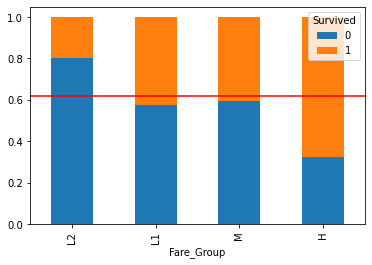

카이제곱통계량 109.28927980021261
p-value 1.5605723946549092e-23


In [7]:
target_mean = titanic[target].mean()
temp = pd.crosstab(titanic['Fare_Group'], titanic[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-target_mean, color = 'r')
plt.show()

table = pd.crosstab(titanic[target], titanic['Fare_Group'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① Sex --> Survived

1) 교차표(pd.crosstab())

In [40]:
pd.crosstab(titanic['Survived'], titanic['Sex'])
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


2) 시각화( Stacked Bar, Mosaic)

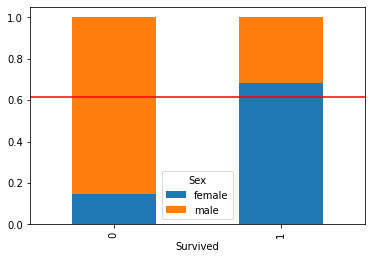

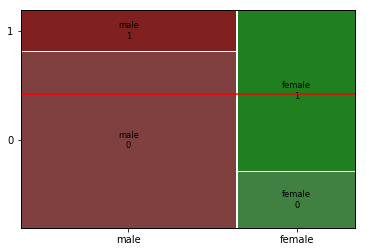

In [42]:
temp = pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

mosaic(titanic, [ 'Sex','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [47]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Sex'])
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 260.71702016732104
p-value 1.1973570627755645e-58
자유도 1


4) 관계 평가하기

* 먼저 카이제곱검정을 보면 자유도가 1 , 카이제곱통계량이 260, p-value가 0과 거의 수렴하기 때문에 성별에 따라 생존율은 큰차이를 보이고 있다.

* 그래프를 통해 남자가 여자보다 더 많이 죽은 것으로 볼 수 있다.
* 남자보다 여자 위주로 구조를 한 것으로 보이고 남자들은 구조를 도운게 아닐까 생각한다.

5) 추가 분석하기

* 성별별 나이 분포

#### ② Pclass --> Survived

1) 교차표(pd.crosstab())

In [55]:
temp = pd.crosstab( titanic['Pclass'],titanic['Survived'], normalize = 'index')
temp

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


2) 시각화( Stacked Bar, Mosaic)

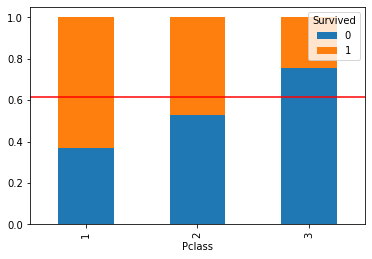

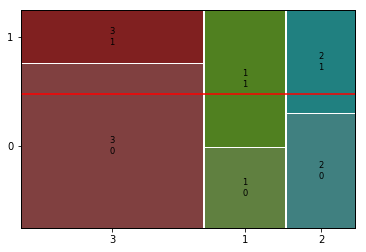

In [56]:
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

mosaic(titanic, [ 'Pclass','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [53]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23
자유도 2


4) 관계 평가하기

* 카이제곱통계량 : 102 , 자유도 : 2, p-value : 0과 거의 수렴 하기 때문에 자리별 생종율은 크게 차이가 있다.
* 3등급 객실이 제일 많고 1등급 2등급 객실은 비슷한 인구로 분포되어 있다.
* 대체로 3등급 객실 사람들의 생존율이 현저히 낮고 2등급 1등급 순으로 되어 있다.
* 등급 별 순서 위주로 구조를 시작한게 아닐까?
* 3등급 객실 사람들은 탈출을 제대로 못 함.

5) 추가 분석하기

* 등급 별 운임비용
* 객실등급과 성별의 조합으로 생존여부를 분석해보자.
    * {1,2,3} * {m,f} = 단순 조합은 총 6가지 범주 {(1,m), (1,f), (2,m), (2,f), (3,m), (3,f)}
    * 일단 6가지로 구분하고 나서, 통합시킬 대상을 선정하는 것 필요.

In [8]:
titanic.groupby(['Pclass','Sex'], as_index = False)['Survived'].mean()

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


#### ③ Embarked --> Survived

1) 교차표(pd.crosstab())

In [57]:
temp = pd.crosstab( titanic['Embarked'],titanic['Survived'], normalize = 'index')
temp

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


2) 시각화( Stacked Bar, Mosaic)

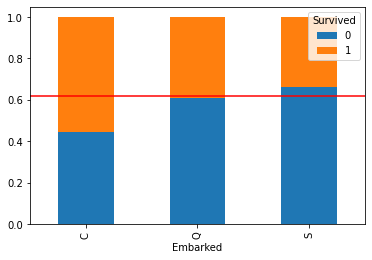

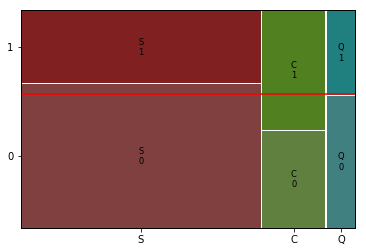

In [58]:
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

mosaic(titanic, [ 'Embarked','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [59]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Embarked'])
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 26.48914983923762
p-value 1.769922284120912e-06
자유도 2


4) 관계 평가하기

* 카이제곱통계량 : 26 , 자유도 : 2, p-value : 0과 거의 수렴 하기 때문에 탑승지역별 생종율은 차이가 있다.
* s의 생존율이 제일 낮고 q > c 순서로 되어 있다.
* s의 탑승객이 제일 많아서 대체적으로 생존율도 더 낮은 것 같다.
* q의 탑승객의 생존율이 평균보다 높은 것으로 보아 부유한 지역이 아닐까 생각한다.

5) 추가 분석하기

* 탑승지역 별 운임비용
* 탑승지역 별 성별 또는 나이분포
* 승선지역과 객실등급과 관련이 있지 않을까...

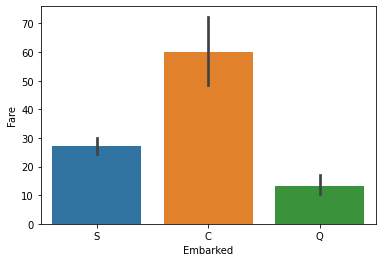

In [10]:
sns.barplot(x="Embarked", y="Fare", data=titanic)
plt.show()

In [9]:
temp = titanic.groupby(['Embarked','Pclass'], as_index=False)['Survived'].mean()


,Embarked,Pclass,Survived
0,C,1,0.694118
1,C,2,0.529412
2,C,3,0.378788
3,Q,1,0.500000
4,Q,2,0.666667
5,Q,3,0.375000
6,S,1,0.582677
7,S,2,0.463415
8,S,3,0.189802


### (3) 관계 정리하기

① 강한관계

* 성별에 따른 생존율
* 객실등급에 따른 생존율

② 중간관계

* 탑승지역에 따른 생존율, 나이

③ 관계없음

* 없음

4) 추가 분석할 내용 정리

* 강변에 위치하려면 오래 전부터 생겨져 있던걸로 추정
* => 집의 나이를 함께 봐야함

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 모델링

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/titanic.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 데이터 살펴보기
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 기초통계정보 확인
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) Title 변수 추가**

In [5]:
# 호칭 추출
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [6]:
# 대표 호칭 이외는 Others로 변경
main_tit_list = ['Mr', 'Miss', 'Mrs']
data.loc[data['Title'].isin(main_tit_list)==False, ['Title']] = 'Others'

**2) 결측치 처리**

In [7]:
# Age 중앙값으로 채우기
data['Age'].fillna(data.groupby('Title')['Age'].transform('median'), inplace=True)

In [8]:
# Embarked 최빈값으로 채우기
data['Embarked'] = data['Embarked'].fillna('S')

**3) AgeGroup 변수 추가**

In [9]:
# 변수 추가
bins = [0, 16, 25, 35, 60, 100]
data['AgeGroup'] = pd.cut(data['Age'], 
                          bins=bins, 
                          labels=['0_16', '17_25', '26_35', '36_60', '61_100'])

**4) 불필요한 변수 제거**

In [10]:
# 불필요한 열 제거
drop_cols = ['PassengerId', 'Name', 'Age', 'Ticket', 'Cabin']
data.drop(drop_cols, axis=1, inplace=True)

**5) 가변수화**

In [11]:
# 가변수화
dummy_vars = ['Title', 'AgeGroup', 'Pclass', 'Sex', 'Embarked']

for v in dummy_vars:
    dummies = pd.get_dummies(data[v], prefix=v, drop_first=True)
    data = pd.concat([data, dummies], axis=1)
    data.drop(v, axis=1, inplace=True)

**6) x, y 분리**

In [12]:
# target 확인
target = 'Survived'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target] 

**7) 정규화**

In [13]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**8) 학습용, 평가용 데이터 분리**

In [14]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델 검증

- 여러 알고리즘으로 모델을 만들고 K-Fold CV로 성능을 검증합니다.
- 하이퍼파라미터를 설정하지 않고 진행합니다.
- 각 모델의 성능 정보를 수집해 마지막에 비교합니다.

## 4.1.KNN

- KNN 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [19]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [20]:
# 선언하기
model = KNeighborsClassifier()

In [21]:
# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv= 10)

In [22]:
# 결과수집
result ={}
result['KNN'] = cv_score.mean()

## 4.2.Decision Tree

- Decision Tree 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [23]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier


In [24]:
# 선언하기
model = DecisionTreeClassifier(random_state=2022)

In [25]:
# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv = 10)

In [26]:
# 결과수집
result['DecisionTreeClassifier'] = cv_score.mean()

## 4.3.Logistic Regression

- Logistic Regression 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [27]:
# 불러오기
from sklearn.linear_model import LogisticRegression

In [28]:
# 선언하기
model = LogisticRegression()

In [29]:
# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv = 10)

In [30]:
# 결과수집
result['Logistic Regression'] = cv_score.mean()

## 4.4.SVM

- SVM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [31]:
# 불러오기
from sklearn.svm import SVC


In [32]:
# 선언하기
model = SVC(random_state=2022)

In [33]:
# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv = 10)

In [34]:
# 결과수집
result['SVM'] = cv_score.mean()

## 4.5.Random Forest

- Random Forest 알고리즘으로 모델링하고  K-Fold CV로 성능을 검증합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [35]:
# 불러오기
from sklearn.ensemble import RandomForestClassifier

In [36]:
# 선언하기
model = RandomForestClassifier(random_state=2022)

In [37]:
# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv = 10)

In [38]:
# 결과수집
result['RandomForestClassifier'] = cv_score.mean()

## 4.6.XGBoost

- XGBoost 알고리즘으로 모델링하고  K-Fold CV로 성능을 검증합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [39]:
# 불러오기
from xgboost import XGBRFClassifier

In [42]:
# 선언하기
model = XGBRFClassifier(random_state=2022,eval_metric = 'mlogloss')

In [43]:
# 성능검증
cv_score = cross_val_score(model, x_train, y_train, cv = 10)

In [44]:
# 결과수집
result['XGBRFClassifier'] = cv_score.mean()

# 5.결과 확인

In [45]:
# 평가 결과 확인
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

KNN 0.838
DecisionTreeClassifier 0.78
Logistic Regression 0.796
SVM 0.824
RandomForestClassifier 0.801
XGBRFClassifier 0.835


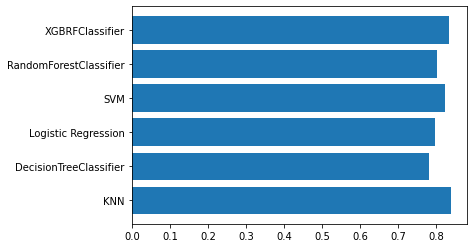

In [46]:
plt.barh( y = list(result) , width=result.values())
plt.show()

# 6.모델 최적화

- SVM 모델을 GridSearchCV를 사용해 최적화합니다.
- 파라미터 범위
    - C: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    - gamma: [0.001, 0.1, 1, 10]}
- GridSearchCV 옵션
    - cv=5

In [47]:
# 1단계: 불러오기
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [64]:
# 2단계: 선언하기
model_svm = SVC(random_state=2022)

param ={'C': np.logspace(-3,3,7),
        'gamma' :np.logspace(-2,1,4)}

model = GridSearchCV(model_svm,
                    param,
                    cv = 5,
                    scoring='accuracy')



In [65]:
# 3단계: 학습하기
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=2022),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([ 0.01,  0.1 ,  1.  , 10.  ])},
             scoring='accuracy')

In [66]:
# 결과확인
print(model.best_estimator_)
print(model.best_score_)

SVC(C=100.0, gamma=0.1, random_state=2022)
0.8331354838709677


In [67]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [69]:
# 5단계: 평가하기
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       168
           1       0.88      0.61      0.72       100

    accuracy                           0.82       268
   macro avg       0.84      0.78      0.80       268
weighted avg       0.83      0.82      0.82       268



# ML Pipeline

## 0.환경준비 

### 1) 라이브러리 

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.metrics import classification_report

### 2) 데이터 불러오기

In [ ]:
use_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp' ,'Parch', 'Fare', 'Embarked']
data = pd.read_csv('data/titanic.csv', usecols = use_cols)
data.head()

## 2.데이터 전처리

### 1) 불필요한 데이터 처리
처음부터 꼭 필요한 칼럼만 지정하여 불러오는 것이 좋습니다.

### 2) 데이터 분할

#### x, y 분할

In [ ]:
target = 'Survived'
x0 = data.drop(target, axis = 1)
y0 = data.loc[:, target]

#### test 분할

여기서는 조금만 떼어 냅시다.

In [ ]:
x, x_test, y, y_test = train_test_split(x0, y0, test_size = 5, random_state = 2022)

In [ ]:
x_test

#### train, val 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 2022)

### 3) Feature Engineering
* family 변수를 추가하려고 합니다. 가족과 관련된 변수가 SibSp, Parch 입니다. 이 둘을 더하고 자기자신까지 포함시켜서 가족 수 변수를 만듭시다.
* 그리고, SibSp, Parch 는 제거합니다.

In [ ]:
x_train['Family'] = x_train['SibSp'].astype('int') + x_train['Parch'].astype('int') + 1
x_train.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
x_train.head()

* 재사용을 위해서는 함수로 만드는 것이 좋습니다.

In [ ]:
def titanic_fe(df):
    temp = df.copy()
    # Family 변수 추가
    temp['Family'] = temp['SibSp'] + temp['Parch'] + 1
    temp.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

    # OOO 추가...
    return temp

#### validation set에 적용하기

In [ ]:
x_val = titanic_fe(x_val)

x_val.head()

### 4) NaN 조치①

* 먼저 x의 NaN을 조사해 봅시다.

In [ ]:
x_train.isna().sum()

* 어떻게 조치 방법에 따라 처리 시점이 달라집니다.
    * Embarked는 최빈값으로 **지금** 채우고
    * Age는 KNNImputer로 **가변수화 후에** 채우겠습니다.

* NaN 행 삭제를 결정한다면...
    * 운영에서 NaN이 들어오면 그 역시 버리겠다는 의미 입니다. 
        * 그래도 괜찮다면...
        * 그러나 괜찮은 상황은 별로 없을 겁니다.

#### SimpleImputer 

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [ ]:
from sklearn.impute import SimpleImputer

* 최빈값으로 채우기 : 보통 범주형(숫자는 이산형)을 채울 때 사용합니다.
    * strategy = 'most_frequent'

In [ ]:
# 대상을 리스트로 선언합시다. 
imputer1_list = ['Embarked']

# 선언하고 fit_transform
imputer1 = SimpleImputer(strategy = 'most_frequent')
x_train[imputer1_list] = imputer1.fit_transform(x_train[imputer1_list])
x_train.isna().sum()

#### validation set에 적용하기

In [ ]:
imputer1_list = ['Embarked']
x_val[imputer1_list] = imputer1.fit_transform(x_val[imputer1_list])

### 5) 가변수화

In [ ]:
cat = {'Sex':["female", "male"]
       , 'Embarked':["C", "Q", "S"]
       ,'Pclass':[1,2,3]}

for k, v in cat.items():
    x_train[k] = pd.Categorical(x_train[k], categories=v, ordered=False)

x.info()

In [ ]:
x_train = pd.get_dummies(x_train, columns =cat.keys(), drop_first = 1)

In [ ]:
x_train.head()

#### validation set에 적용하기

In [ ]:
# 함수로 생성

cat = {'Sex':["female", "male"]
       , 'Embarked':["C", "Q", "S"]
       ,'Pclass':[1,2,3]}

def titanic_dumm(df, cat):
    temp = df.copy()
    for k, v in cat.items():
        temp[k] = pd.Categorical(temp[k], categories=v, ordered=False)
    temp = pd.get_dummies(temp, columns =cat.keys(), drop_first = 1)
    return temp
x_val = titanic_dumm(x_val, cat)
x_val.head()

### 6) 스케일링


In [ ]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)

#### validation set에 적용하기

In [ ]:
# validation 적용
x_val_s = scaler.transform(x_val)

### 7) NaN 조치②

#### KNNImputer
https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer2_list = list(x_train)
imputer2_list

In [ ]:
# 선언하고 fit_transform
imputer2 = KNNImputer()
x_train_s = imputer2.fit_transform(x_train_s)

#### validation set에 적용하기

In [ ]:
# validation 적용
x_val_s = imputer2.transform(x_val_s)

## 3.모델링

여기에서는 성능 최적화가 주안점이 아니므로 기본값으로 모델링을 수행합니다.

In [ ]:
# SVM으로 모델링 수행
model = SVC()
model.fit(x_train_s, y_train)

In [ ]:
# validation
pred = model.predict(x_val_s)
print(classification_report(y_val, pred))

In [ ]:
# new data : x_test
x_test.head()

### 1) [validation에 적용하기] 코드들 가져오기

* 함수, 변수 선언

In [ ]:
def titanic_fe(df):
    temp = df.copy()
    # Family 변수 추가
    temp['Family'] = temp['SibSp'] + temp['Parch'] + 1
    temp.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

    # OOO 추가...
    return temp

def titanic_dumm(df, cat):
    for k, v in cat.items():
        df[k] = pd.Categorical(df[k], categories=v, ordered=False)
    df = pd.get_dummies(df, columns =cat.keys(), drop_first = 1)
    return df

imputer1_list = ['Embarked']

cat = {'Sex':["female", "male"]
       , 'Embarked':["C", "Q", "S"]
       ,'Pclass':[1,2,3]}

* 전처리 실행

In [ ]:
temp = x_test.copy()

In [ ]:
# Feature Engineering
temp = titanic_fe(temp)

# NaN 조치① : SimpleImputer
temp[imputer1_list] = imputer1.fit_transform(temp[imputer1_list])

# 가변수화
temp = titanic_dumm(temp, cat)

# 스케일링
temp = scaler.transform(temp)

# NaN 조치② : KNNImputer
temp = imputer2.transform(temp)

temp

### 2) Data Pipeline 함수 만들고 실행하기

In [ ]:
def titanic_datapipeline(df, simpleimputer, simple_impute_list, dumm_list, scaler, knnimputer):

    temp = df.copy()

    # Feature Engineering
    temp = titanic_fe(temp)

    # NaN 조치① : SimpleImputer
    temp[simple_impute_list] = simpleimputer.fit_transform(temp[simple_impute_list])

    # 가변수화
    temp = titanic_dumm(temp, dumm_list)

    x_cols = list(temp)
    # 스케일링
    temp = scaler.transform(temp)

    # NaN 조치② : KNNImputer
    temp = knnimputer.transform(temp)

    return pd.DataFrame(temp, columns = x_cols)


## 5.파이썬 오브젝트 저장하기

* 함수 생성하기

In [ ]:
def titanic_fe(df):
    temp = df.copy()
    # Family 변수 추가
    temp['Family'] = temp['SibSp'] + temp['Parch'] + 1
    temp.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

    # OOO 추가...
    return temp

def titanic_dumm(df, cat):
    for k, v in cat.items():
        df[k] = pd.Categorical(df[k], categories=v, ordered=False)
    df = pd.get_dummies(df, columns =cat.keys(), drop_first = 1)
    return df

def titanic_datapipeline(df, simpleimputer, simple_impute_list, dumm_list, , scaler, knnimputer):

    temp = df.copy()

    # Feature Engineering
    temp = titanic_fe(temp)

    # NaN 조치① : SimpleImputer
    temp[simple_impute_list] = simpleimputer.fit_transform(temp[simple_impute_list])

    # 가변수화
    temp = titanic_dumm(temp, dumm_list)

    x_cols = list(temp)

    # 스케일링
    temp = scaler.transform(temp)

    # NaN 조치② : KNNImputer
    temp = knnimputer.transform(temp)

    return pd.DataFrame(temp, columns = x_cols)


* 오브젝트들 불러오기

In [ ]:
imputer1_list = joblib.load('imputer1_list.pkl')
cat = joblib.load('cat.pkl')

imputer1 = joblib.load('preprocess/imputer1.pkl')
imputer2 = joblib.load('preprocess/imputer2.pkl')
scaler = joblib.load('preprocess/scaler.pkl')
model = joblib.load('model/model.pkl')

* 적용하기

In [ ]:
# 적용
input = titanic_datapipeline(x_test, imputer1, imputer1_list, cat, scaler, imputer2)

In [ ]:
input

In [ ]:
# 예측
model.predict(input)

* 모델_timestamp.pkl 형식으로 모델에 대한 버전관리를 해 봅시다.

* timestamp 만들기

In [ ]:
import datetime

now = datetime.datetime.now()
timestamp = now.strftime("%Y%m%d_%H%M%S")
print(timestamp)

* 모델 이름에 붙이기

In [ ]:
now = datetime.datetime.now()
timestamp = now.strftime("%Y%m%d_%H%M%S")

model_fname = 'model_' + timestamp + '.pkl'
joblib.dump(model, model_fname)

* 모델을 추가해 봅시다.

In [ ]:
x_train = titanic_datapipeline(x_train, imputer1, imputer1_list, cat, imputer2, scaler)

model = SVC(C=0.1)
model.fit(x_train, y_train)

now = datetime.datetime.now()
timestamp = now.strftime("%Y%m%d_%H%M%S")

model_fname = 'model_' + timestamp + '.pkl'
joblib.dump(model, model_fname)

# 클라이언트 API호출

In [1]:
import pandas as pd
import numpy as np
import requests
import json

### 1. 단일 값 호출

In [3]:
import requests

input = {'Pclass': 1,
 'Sex': 'male',
 'Age': 22.0,
 'SibSp': 0,
 'Parch': 0,
 'Fare':  71.89,
 'Embarked': 'Q'}
response = requests.post('http://127.0.0.1:8080/predict/', data = input)
result = response.json() # 결과를 json 형태로 받아와 저장하지만, python에서는 딕셔너리로 저장됨.
result['pred']

['Died']

## 2. 여러 값 호출

In [4]:
input = {'Pclass': [1,2],
 'Sex': ['male','female'],
 'Age': [22.0, 34],
 'SibSp': [0, 2],
 'Parch': [0, 2],
 'Fare':  [71.89, 31],
 'Embarked': ['Q','S']}
response = requests.post('http://127.0.0.1:8080/predict/', data = input)
result = response.json() # 결과를 json 형태로 받아와 저장하지만, python에서는 딕셔너리로 저장됨.
result['pred']

['Died', 'Survived']

## 3. 데이터셋(배치)으로 전달하기

* 데이터프레임으로 부터 정보 전달하기1

In [5]:
use_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp' ,'Parch', 'Fare', 'Embarked']
data = pd.read_csv('data/new_data.csv', usecols = use_cols)
target = 'Survived'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [6]:
temp = x.sample(3)

In [7]:
input = temp.to_json(orient = 'columns')
input = json.loads(input)
input

{'Pclass': {'15': 2, '7': 3, '2': 3},
 'Sex': {'15': 'male', '7': 'male', '2': 'male'},
 'Age': {'15': 27.0, '7': None, '2': 47.0},
 'SibSp': {'15': 0, '7': 0, '2': 0},
 'Parch': {'15': 0, '7': 0, '2': 0},
 'Fare': {'15': 13.0, '7': 7.8958, '2': 9.0},
 'Embarked': {'15': 'S', '7': 'S', '2': 'S'}}

In [8]:
input = { key : list(temp[key]) for key in list(temp) }
input

{'Pclass': [2, 3, 3],
 'Sex': ['male', 'male', 'male'],
 'Age': [27.0, nan, 47.0],
 'SibSp': [0, 0, 0],
 'Parch': [0, 0, 0],
 'Fare': [13.0, 7.8958, 9.0],
 'Embarked': ['S', 'S', 'S']}

In [9]:
response = requests.post('http://127.0.0.1:8080/predict/', data = input)
result = response.json() 
result['pred']

['Died', 'Died', 'Died']

* 데이터프레임으로 부터 정보전달하고, 예측결과 합치기

In [10]:
# request
input = { key : list(x[key]) for key in list(x) }
response = requests.post('http://127.0.0.1:8080/predict/', data = input)
result = response.json() 

In [11]:
# 결과 합치기
x['y'] = y
x['y_pred'] = result['pred']
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,y,y_pred
0,1,female,47.0,1,1,52.5542,S,1,Survived
1,1,male,33.0,0,0,5.0000,S,0,Died
2,3,male,47.0,0,0,9.0000,S,0,Died
3,2,female,28.0,1,0,24.0000,C,1,Survived
4,3,female,15.0,0,0,7.2250,C,1,Survived
5,3,male,20.0,0,0,9.8458,S,0,Died
6,3,male,19.0,0,0,7.8958,S,0,Died
7,3,male,NaN,0,0,7.8958,S,0,Died
8,1,female,56.0,0,1,83.1583,C,1,Survived
9,2,female,25.0,0,1,26.0000,S,1,Survived
